<a href="https://colab.research.google.com/github/yjin94606-art/-/blob/main/Untitled10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
# 安装依赖（Colab部分已预装，确保以下库可用）
!pip install jieba gensim scikit-learn

# 安装支持中文显示的字体
!apt-get -qq install -y fonts-wqy-zenhei
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 配置matplotlib使用中文
fm.fontManager.addfont('/usr/share/fonts/truetype/wqy/wqy-zenhei.ttc')
plt.rcParams['font.sans-serif'] = ['WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False


# 导入工具库
import jieba
from gensim.models import Word2Vec, KeyedVectors
import numpy as np
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

In [12]:
target_word = "女人"
if target_word in model.wv:
  vec = model.wv[target_word]
  print(f"\n{target_word}的词向量（前5维）:{vec[:5]}")
  print(f"词向量形状{vec.shape}")
else:
  print(f"词汇表中无{target_word}")

# 示例2：批量获取多个词的向量
words = ["男人", "人工智能", "水果", "电子设备"]
vec_dict = {}
for w in words:
    if w in model.wv:
        vec_dict[w] = model.wv[w]
        print(f"『{w}』的词向量已获取")
    else:
        print(f"⚠️ 词汇表中无『{w}』")



女人的词向量（前5维）:[-0.00697095 -0.00247066 -0.00801368  0.00751092  0.00614718]
词向量形状(100,)
『男人』的词向量已获取
『人工智能』的词向量已获取
『水果』的词向量已获取
『电子设备』的词向量已获取


In [6]:
def preprocess(text):
  words = jieba.lcut(text)
  stopwords = {"的","是","在","涉及","能","如","用于","任务","验证","后"}
  return [w for w in words if w not in stopwords and len(w) > 1]

sentences = [preprocess(text) for text in corpus]
print("预处理后实例" , sentences[0])

model = Word2Vec(
    sentences,
    vector_size=100,
    window=5,
    min_count=1,
    sg=1
)
print("模型训练完成！词汇表大小",{len(model.wv)})

预处理后实例 ['自然语言', '处理', '人工智能', '核心', '领域', '向量', '生成', '语义', '理解']
模型训练完成！词汇表大小 {53}


In [10]:
# ===================== 步骤1：训练Word2Vec模型 =====================
# 准备中文语料（涵盖多领域词汇，支持后续评估）
corpus = [
    "自然语言处理是人工智能的核心领域，涉及词向量生成与语义理解",
    "Word2Vec模型包含CBOW和Skip-gram两种架构，能学习词语的语义关联",
    "向量生成后可用于计算语义相似度，比如猫和狗的相似度较高",
    "语义推理任务如国王-男人+女人=女王，验证词向量的线性关系",
    "苹果 香蕉 水果 食物 营养 健康",
    "电脑 手机 平板 电子设备 科技 智能",
    "父亲 母亲 儿子 女儿 家庭 亲属",
    "北京 中国 华盛顿 美国 首都 国家"
]

In [16]:
text_path = "word_vectors_text.txt"
model.wv.save_word2vec_format(text_path, binary=False)
print(f"\n 文版格式已保存到{text_path}")

loaded_text = KeyedVectors.load_word2vec_format(text_path, binary = False)
print(f"加载文版向量成功，前三维{loaded_text['自然语言']}[:3]")

binary_path = "word_vectors_binary.bin"
model.wv.save_word2vec_format(binary_path, binary=True)
print(f"二进制格式向量已保存到{binary_path}")

loaded_binary =KeyedVectors.load_word2vec_format(binary_path, binary = True)


 文版格式已保存到word_vectors_text.txt
加载文版向量成功，前三维[ 6.9790934e-03 -2.0951152e-04 -7.9470100e-03  8.8905953e-03
 -8.5516348e-03  5.5598891e-03  6.4678504e-03  9.7577932e-04
 -8.6925616e-03  6.1753215e-03 -7.8478707e-03 -5.0177681e-03
  9.6247876e-03 -8.2821418e-03 -7.6285531e-03 -4.9005579e-03
  3.4631919e-03  1.9144202e-03 -5.5585168e-03 -3.2763958e-03
  8.5835531e-03  9.7675994e-03  9.9147148e-03  1.0454941e-03
  4.0380000e-03  1.3658536e-03  1.6727329e-03  4.8383819e-03
  2.2040391e-03  3.0054449e-04 -3.1488347e-03 -6.5247416e-03
  7.9894923e-03 -5.9719621e-03  2.7833520e-03 -9.2541694e-04
 -3.6488725e-03 -4.9413932e-03  3.2202196e-03 -5.8576204e-03
 -7.4947942e-03 -2.6441026e-03  4.6893787e-03  6.0440982e-03
 -1.4566731e-03  7.2986148e-03 -7.5932704e-03 -4.7327732e-03
 -7.8608748e-03 -6.0471091e-03  7.3008193e-03 -9.2807058e-03
 -8.6519560e-03 -9.8145390e-03  9.2028119e-03 -2.6650822e-03
  9.9734659e-04 -6.1275125e-03 -2.5342822e-03  7.2566268e-05
 -2.5002421e-03 -7.3716044e-03 -6.1929417

In [20]:
word_a, word_b = "女儿","儿子"
if word_a in model.wv and word_b in model.wv:
  sim  = model.wv.similarity(word_a, word_b)
  print(f"\n{word_a}与{word_b}相似度{sim:.4f}")

else:
  print(f"{word_a}或{word_b}不在")

target = "水果"
top_n = 3
if target in model.wv:
  similar_words = model.wv.most_similar(target,topn=top_n)
  print(f"\n {target}最相似的 {top_n}个词")
  for w, s in similar_words:
    print(f"{w}: {s:.4f}")

  else:
    print(f"词汇表没有{target}")


女儿与儿子相似度-0.0323

 水果最相似的 3个词
健康: 0.2362
计算: 0.1723
学习: 0.1341
词汇表没有水果



🧩 语义推理：父亲 - 男人 + 女人 = 国家（相似度：0.1558）

🔖 K-Means聚类结果：
  类别1：['手机', '美国']
  类别2：['苹果', '水果', '平板', '女儿', '北京', '中国']
  类别3：['人工智能', '香蕉', '电子设备', '父亲']
  类别4：['食物', '电脑', '母亲', '儿子', '华盛顿']


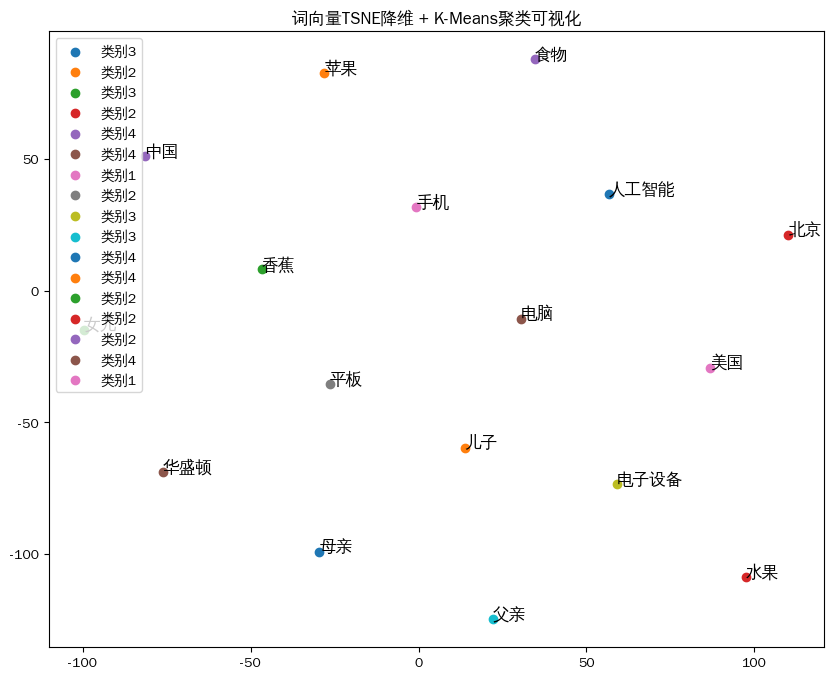

📊 可视化图表已生成（查看Colab输出区域）


In [28]:
# ===================== 步骤5：效果评估：语义推理（线性关系） =====================
# 示例：父亲 - 男人 + 女人 → ？（类比“国王 - 男人 + 女人 = 女王”）
positive = ["父亲", "女人"]
negative = ["男人"]
try:
    result = model.wv.most_similar(positive=positive, negative=negative, topn=1)
    print(f"\n🧩 语义推理：{positive[0]} - {negative[0]} + {positive[1]} = {result[0][0]}（相似度：{result[0][1]:.4f}）")
except KeyError as e:
    print(f"⚠️ 词汇表缺少词 {e}，无法推理")


# ===================== 步骤6：效果评估：聚类 + TSNE可视化 =====================
# 选取待聚类的词汇（覆盖不同语义领域）
cluster_words = ["自然语言处理", "人工智能", "机器学习", "深度学习",
                 "苹果", "香蕉", "水果", "食物",
                 "电脑", "手机", "平板", "电子设备",
                 "父亲", "母亲", "儿子", "女儿",
                 "北京", "中国", "华盛顿", "美国"]

# 过滤词汇表中不存在的词
valid_words = [w for w in cluster_words if w in model.wv]
if len(valid_words) < 2:
    print("⚠️ 有效聚类词汇不足，跳过此步骤")
else:
    # 获取词向量矩阵
    vec_matrix = np.array([model.wv[w] for w in valid_words])

    # 1. K-Means聚类（假设分4类，可修改n_clusters）
    n_clusters = 4
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(vec_matrix)
    print("\n🔖 K-Means聚类结果：")
    for i in range(n_clusters):
        group = [valid_words[j] for j, lab in enumerate(labels) if lab == i]
        print(f"  类别{i+1}：{group}")

    # 2. TSNE降维（100维→2维，便于可视化）
    # Adjust perplexity based on the number of samples
    perplexity_value = min(30, len(valid_words) - 1) if len(valid_words) > 1 else 1
    if perplexity_value > 1:
        tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity_value)
        vec_2d = tsne.fit_transform(vec_matrix)

        # 3. 绘制散点图（带词语标注）
        plt.figure(figsize=(10, 8))
        for i, lab in enumerate(labels):
            plt.scatter(vec_2d[i, 0], vec_2d[i, 1], label=f"类别{lab+1}")
            plt.annotate(valid_words[i], (vec_2d[i, 0], vec_2d[i, 1]), fontsize=12)
        plt.title("词向量TSNE降维 + K-Means聚类可视化")
        plt.legend()
        plt.show()
        print("📊 可视化图表已生成（查看Colab输出区域）")
    else:
        print("⚠️ 有效聚类词汇不足以进行TSNE可视化")

In [22]:
# 3.2 存储为**二进制格式**（高效，适合大模型）
binary_path = "word_vectors_binary.bin"
model.wv.save_word2vec_format(binary_path, binary=True)
print(f"📦 二进制格式向量已保存至：{binary_path}")

# 加载二进制格式向量
loaded_binary = KeyedVectors.load_word2vec_format(binary_path, binary=True)
print(f"🔌 加载二进制向量成功，『人工智能』前3维：{loaded_binary['人工智能'][:3]}")

📦 二进制格式向量已保存至：word_vectors_binary.bin
🔌 加载二进制向量成功，『人工智能』前3维：[-0.00250885 -0.00590262  0.00748412]
